In [1]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
from scipy.signal import correlate
from sklearn.decomposition import PCA
from fastdtw import fastdtw
import plotly.express as px
import pandas as pd

from helpers import record_audio_normalized, align_clips, noise_reduction_filter, plot_audio_data_lists

In [2]:
# Set up PyAudio and recording settings
CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100

In [3]:
num_recordings = 8
audio_data_list_word1 = []

# Record audio 8 times
for i in range(1, num_recordings + 1):
    print(f"Recording {i}:")
    audio_data = record_audio_normalized()
    audio_data_list_word1.append(audio_data)

Recording 1:
Recording...
Done recording
Recording 2:
Recording...
Done recording
Recording 3:
Recording...
Done recording
Recording 4:
Recording...
Done recording
Recording 5:
Recording...
Done recording
Recording 6:
Recording...
Done recording
Recording 7:
Recording...
Done recording
Recording 8:
Recording...
Done recording


In [4]:
num_recordings = 8
audio_data_list_word2 = []

# Record audio 8 times
for i in range(1, num_recordings + 1):
    print(f"Recording {i}:")
    audio_data = record_audio_normalized()
    audio_data_list_word2.append(audio_data)

Recording 1:
Recording...
Done recording
Recording 2:
Recording...
Done recording
Recording 3:
Recording...
Done recording
Recording 4:
Recording...
Done recording
Recording 5:
Recording...
Done recording
Recording 6:
Recording...
Done recording
Recording 7:
Recording...
Done recording
Recording 8:
Recording...
Done recording


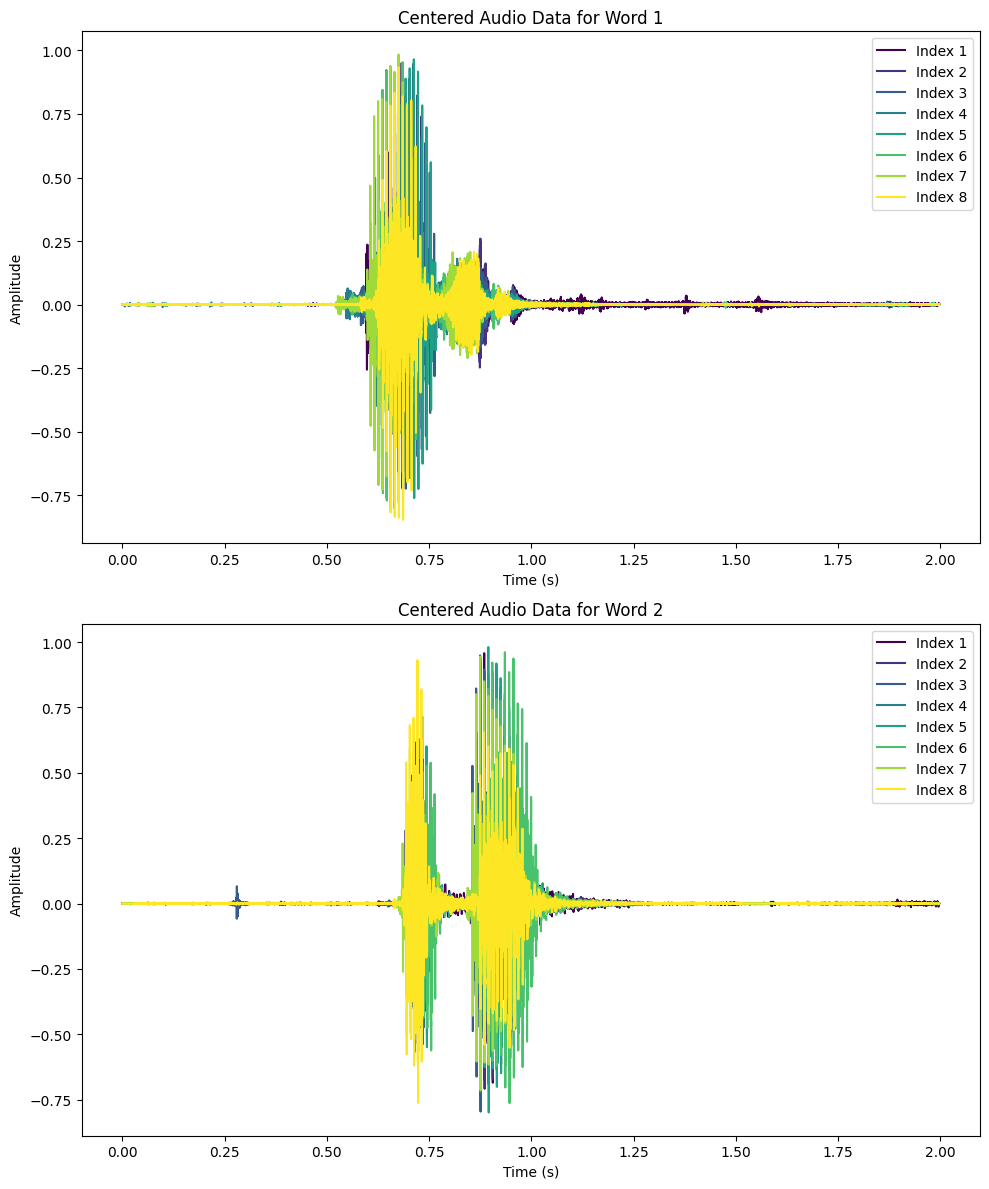

In [5]:
reference_clip_1 = audio_data_list_word1[0]
reference_clip_2 = audio_data_list_word2[0]

cleaned_clips_1 = noise_reduction_filter(align_clips(audio_data_list_word1, reference_clip_1))
cleaned_clips_2 = noise_reduction_filter(align_clips(audio_data_list_word2, reference_clip_2))

plot_audio_data_lists(cleaned_clips_1, cleaned_clips_2)

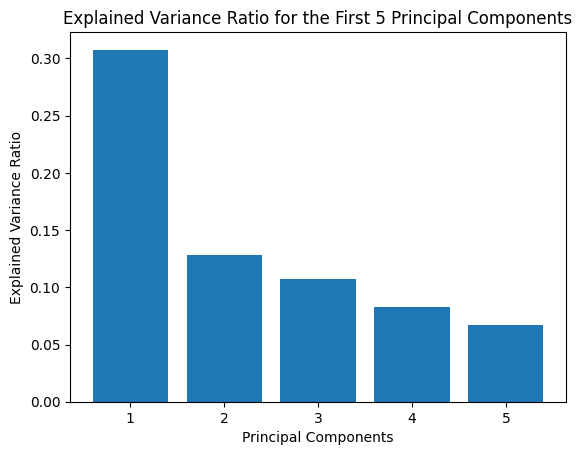

In [6]:
# Concatenate the cleaned_clips_1 and cleaned_clips_2 into a single matrix
combined_data = np.vstack((cleaned_clips_1, cleaned_clips_2))

# Perform PCA
pca = PCA(n_components=5)
pca.fit(combined_data)

# Plot the first 5 principal components on a histogram
plt.bar(range(1, 6), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for the First 5 Principal Components')
plt.show()

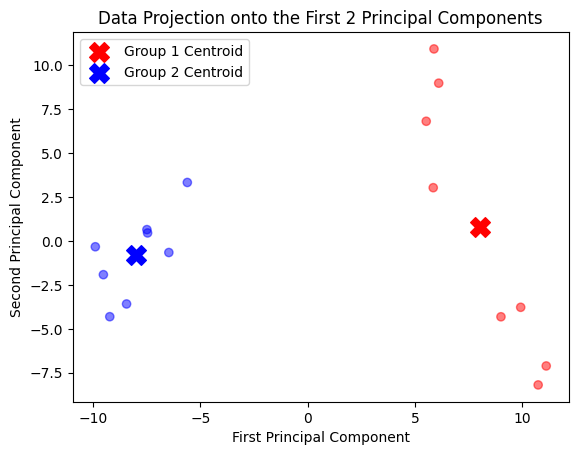

In [7]:
# Project the data onto the first 2 principal components
projected_data = pca.transform(combined_data)[:, :2]

# Define colors for each matrix
colors = ['red'] * len(cleaned_clips_1) + ['blue'] * len(cleaned_clips_2)



# Calculate the centroids of each group
centroid_1 = np.mean(projected_data[:len(cleaned_clips_1), :2], axis=0)
centroid_2 = np.mean(projected_data[len(cleaned_clips_1):, :2], axis=0)

# Project the data onto the first 2 principal components
projected_data = pca.transform(combined_data)[:, :2]

# Define colors for each matrix
colors = ['red'] * len(cleaned_clips_1) + ['blue'] * len(cleaned_clips_2)


# Define colors for each matrix and corresponding labels
color_labels = {'red': 'Group 1', 'blue': 'Group 2'}
colors = ['red'] * len(cleaned_clips_1) + ['blue'] * len(cleaned_clips_2)

# Plot the data points and centroids
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=colors, alpha=0.5)
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='X', s=200, label=color_labels['red'] + ' Centroid')
plt.scatter(centroid_2[0], centroid_2[1], c='blue', marker='X', s=200, label=color_labels['blue'] + ' Centroid')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Projection onto the First 2 Principal Components')
plt.legend()
plt.show()

In [8]:
# Project the data onto the first 3 principal components
projected_data_3d = pca.transform(combined_data)[:, :3]

# Calculate the centroids of each group in 3D
centroid_1_3d = np.mean(projected_data_3d[:len(cleaned_clips_1), :], axis=0)
centroid_2_3d = np.mean(projected_data_3d[len(cleaned_clips_1):, :], axis=0)

# Create a DataFrame for the projected data
df = pd.DataFrame(projected_data_3d, columns=['PC1', 'PC2', 'PC3'])
df['group'] = ['Group 1'] * len(cleaned_clips_1) + ['Group 2'] * len(cleaned_clips_2)

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame([centroid_1_3d, centroid_2_3d], columns=['PC1', 'PC2', 'PC3'])
centroids_df['group'] = ['Centroid 1', 'Centroid 2']

# Concatenate the data points and centroids DataFrames
combined_df = pd.concat([df, centroids_df], ignore_index=True)

# Create an interactive 3D scatter plot
fig = px.scatter_3d(combined_df, x='PC1', y='PC2', z='PC3', color='group', symbol='group',
                    text='group', opacity=0.7, title='Data Projection onto the First 3 Principal Components')
fig.show()

Recording...
Done recording


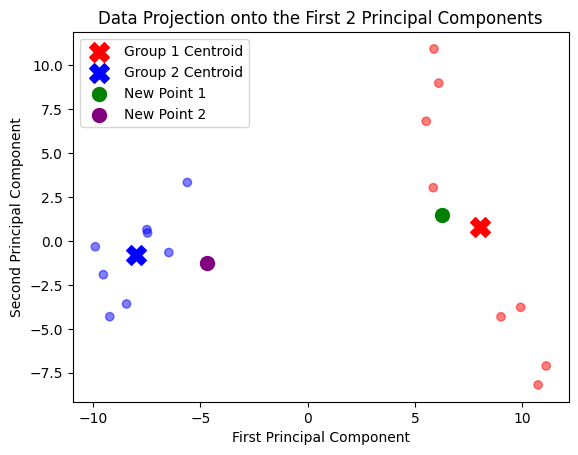

Distance from pred_w_1 to centroid 1: 1.9135178234358186
Distance from pred_w_2 to centroid 2: 3.3603880136271913
Prediction is Word 1


In [10]:
# Record and center data
test_data = record_audio_normalized()
cleaned_w_1 = noise_reduction_filter(align_clips([test_data], reference_clip_1))
cleaned_w_2 = noise_reduction_filter(align_clips([test_data], reference_clip_2))

# Project data onto vectors
pred_w_1 = pca.transform(cleaned_w_1)[:, :2][0]
pred_w_2 = pca.transform(cleaned_w_2)[:, :2][0]

# Define colors for each new point and corresponding labels
new_colors = ['green', 'purple']
new_color_labels = {'green': 'New Point 1', 'purple': 'New Point 2'}

# Plot the data points, centroids, and new points
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=colors, alpha=0.5)
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='X', s=200, label=color_labels['red'] + ' Centroid')
plt.scatter(centroid_2[0], centroid_2[1], c='blue', marker='X', s=200, label=color_labels['blue'] + ' Centroid')
plt.scatter(pred_w_1[0], pred_w_1[1], c=new_colors[0], marker='o', s=100, label=new_color_labels['green'])
plt.scatter(pred_w_2[0], pred_w_2[1], c=new_colors[1], marker='o', s=100, label=new_color_labels['purple'])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Projection onto the First 2 Principal Components')
plt.legend()
plt.show()

# Calculate the Euclidean distances
distance_pred_w_1_to_centroid_1 = np.linalg.norm(pred_w_1 - centroid_1)
distance_pred_w_2_to_centroid_2 = np.linalg.norm(pred_w_2 - centroid_2)

print(f"Distance from pred_w_1 to centroid 1: {distance_pred_w_1_to_centroid_1}")
print(f"Distance from pred_w_2 to centroid 2: {distance_pred_w_2_to_centroid_2}")
if distance_pred_w_1_to_centroid_1 <= distance_pred_w_2_to_centroid_2:
    print("Prediction is Word 1")
else:
    print("Prediction is Word 2")